### Table of Contents

1. **Setup and Installation**
   - Install and upgrade necessary packages (langchain, langchain-community, langchain-together)

2. **Introduction to Together AI**
   - Overview of Together AI platform
   - Features and benefits

3. **Setting up the Language Model**
   - Import ChatTogether
   - Initialize the LLM with Together AI

4. **Document Loaders Introduction**
   - Explanation of document loaders in LangChain
   - Types of document loaders (file type-based and data source-based)

5. **YouTube Transcript Loader**
   - Install required packages (youtube_transcript_api, pytube)
   - Import YoutubeLoader
   - Load transcript from a YouTube video

6. **Processing YouTube Transcript**
   - Display raw transcript content
   - Use LLM to summarize and extract key points from the transcript

7. **Introduction to Prompt Templates**
   - Explanation of PromptTemplate in LangChain
   - Creating a custom prompt template for video summarization

8. **Using LLMChain for Summarization**
   - Create an LLMChain with the custom prompt template
   - Generate a summary of the video transcript using the chain

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install --upgrade --quiet langchain
!pip install --quiet langchain-community
!pip install --upgrade --quiet langchain-together

## Together AI

https://www.together.ai/about
this is another platform offering you the best open source models to work with, 
using the llm apis like open ai, without worrying about the underlying infrastructure.

- they add the latest realeases of LLMs in just a few days of its launch.
- you have the flexibility to choose from any models for any tasks like chat, moderation, image generation etc.
- if your work load is really high you can opt for dedicated gpu for your work load
- they also offer gpus for training of your own models from scratch or fine tuning as required

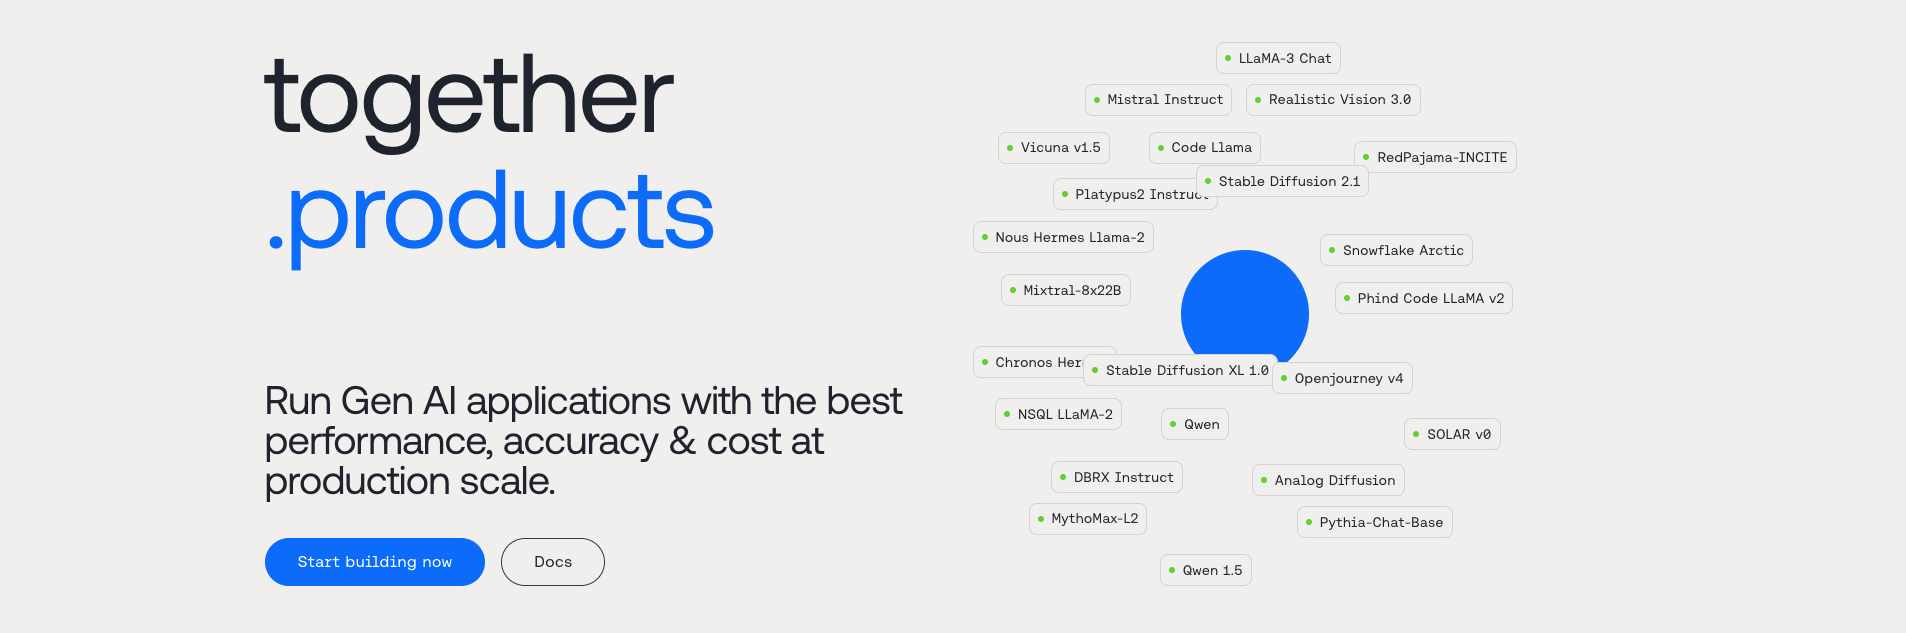

In [3]:
## setting up the language model
from langchain_together import ChatTogether
import api_key

llm = ChatTogether(api_key=api_key.api,temperature=0.0, model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo")

ModuleNotFoundError: No module named 'api_key'

### Introduction to Document loaders

**Document loaders provide a unified interface to load data from various sources into a standardized Document format**.

- Document loaders automatically extract and attach relevant metadata to the loaded content.

- This metadata can include source information, timestamps, or other contextual data that can be valuable for downstream processing.

- LangChain offers loaders for CSV, PDF, HTML, JSON, and even specialized loaders for sources like YouTube transcripts or GitHub repositories, as listed in their integrations page.

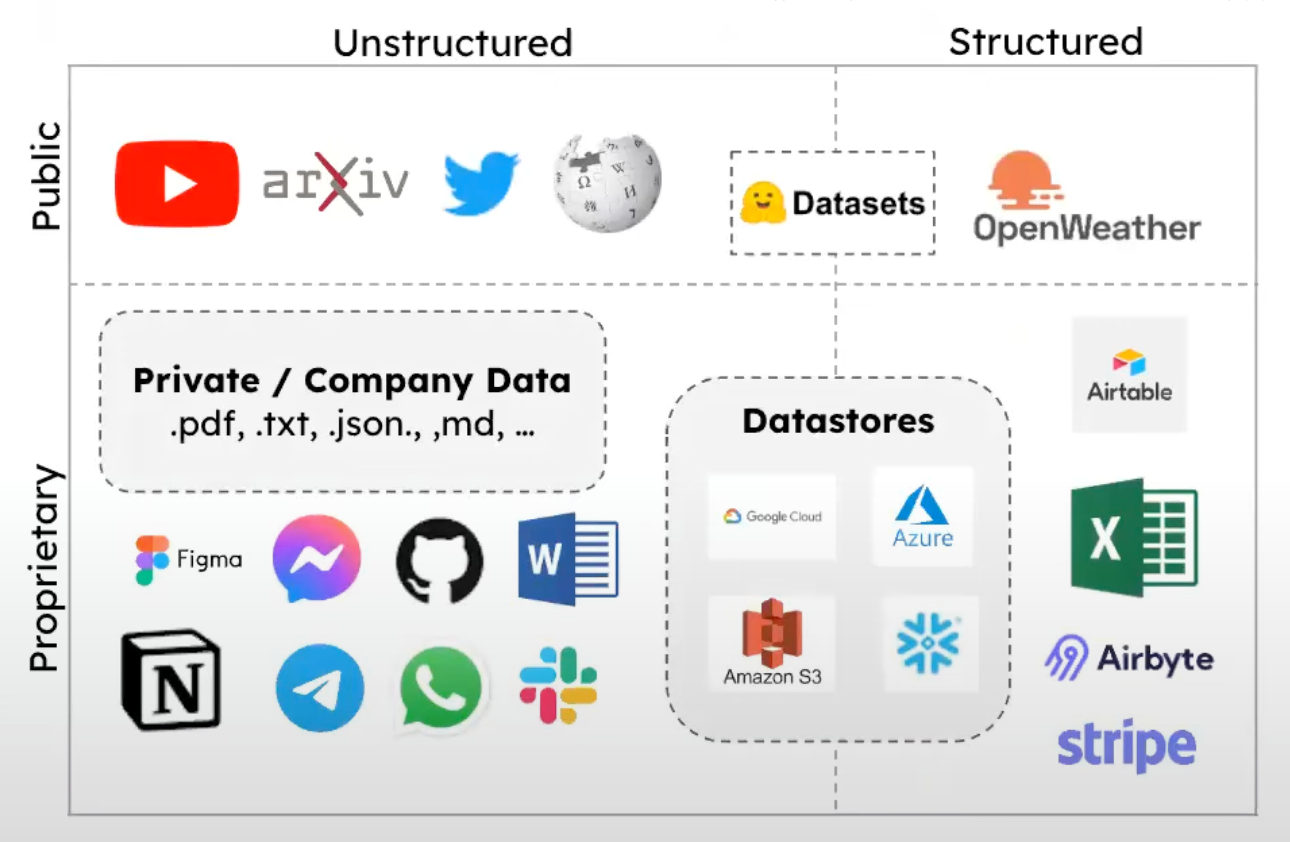

### Different document loaders

https://python.langchain.com/v0.1/docs/integrations/document_loaders/

LangChain offers a wide variety of document loaders to integrate with various file formats and data sources. These loaders are designed to parse and load documents into a standardized format for further processing.

#### Overview

- LangChain provides [over 200 document loaders](https://python.langchain.com/v0.1/docs/integrations/document_loaders/)
- These loaders support a wide range of file formats and data sources
- They are designed to work seamlessly with LangChain's document processing pipeline

#### Categories of Document Loaders

Document loaders in LangChain can be broadly categorized into two types:

1. **File Type-Based Loaders**
   - Parse and load documents based on specific file formats
   - Examples include:
     - CSV
     - PDF
     - HTML
     - Markdown

2. **Data Source-Based Loaders**
   - Retrieve data from various external sources
   - Load the data into Document objects
   - Examples include:
     - YouTube
     - Wikipedia
     - GitHub

#### Integration Capabilities

- LangChain's document loaders can integrate with almost any file format you might need
- They also support many third-party data sources

Let's try youtube video transcripts

In [ ]:
! pip install youtube_transcript_api
! pip install pytube

### YoutubeLoader from LangChain to get transcript

In [ ]:
## import the youtube documnent loader from LangChain
from langchain_community.document_loaders import YoutubeLoader

video_url = 'https://www.youtube.com/watch?v=gaWxyWwziwE'
loader = YoutubeLoader.from_youtube_url(video_url, add_video_info=False)
data = loader.load()

### Processing YouTube Transcript
   - Display raw transcript content
   - Use LLM to summarize and extract key points from the transcript

In [ ]:
# show the extracted page content
data[0].page_content

In [ ]:
# This code creates a list of messages for the language model:
# 1. A system message with instructions on how to summarize the video transcript
# 2. A human message containing the actual video transcript

# The messages are then passed to the language model (llm) for processing
# The model's response is stored in the 'ai_msg' variable and returned

messages = [
    (
        "system", 
        """Read through the entire transcript carefully.
           Provide a concise summary of the video's main topic and purpose.
           Extract and list the five most interesting or important points from the transcript. For each point: State the key idea in a clear and concise manner.

        - Ensure your summary and key points capture the essence of the video without including unnecessary details.
        - Use clear, engaging language that is accessible to a general audience.
        - If the transcript includes any statistical data, expert opinions, or unique insights, prioritize including these in your summary or key points.""",
    ),
    ("human", data[0].page_content),
]
ai_msg = llm.invoke(messages)
ai_msg

### Prompt template in LangChain

A PromptTemplate in LangChain is a powerful tool that helps in creating dynamic prompts for large language models (LLMs). It allows you to define a template with placeholders for variables that can be filled in with actual values at runtime. This helps in managing and reusing prompts efficiently, ensuring consistency and reducing the likelihood of errors in prompt creation.

A PromptTemplate consists of:

- **Template String**: The actual prompt text with placeholders for variables.
- **Input Variables**: A list of variables that will be replaced in the template string at runtime.

In [ ]:
# Set up a prompt template for summarizing a video transcript using LangChain

# Import necessary classes from LangChain
from langchain.prompts import PromptTemplate
from langchain import LLMChain

# Define a PromptTemplate for summarizing video transcripts
# The template includes instructions for the AI model on how to process the transcript
product_description_template = PromptTemplate(
    input_variables=["video_transcript"],
    template="""
    Read through the entire transcript carefully.
           Provide a concise summary of the video's main topic and purpose.
           Extract and list the five most interesting or important points from the transcript. 
           For each point: State the key idea in a clear and concise manner.

        - Ensure your summary and key points capture the essence of the video without including unnecessary details.
        - Use clear, engaging language that is accessible to a general audience.
        - If the transcript includes any statistical data, expert opinions, or unique insights, 
        prioritize including these in your summary or key points.
    
    Video transcript: {video_transcript}    """
)

### Using LLMChain for Summarization
   - Create an LLMChain with the custom prompt template
   - Generate a summary of the video transcript using the chain

In [ ]:
## invoke the chain with the video transcript 
chain = LLMChain(llm=llm, prompt=product_description_template)

# Run the chain with the provided product details
summary = chain.invoke({
    "video_transcript": data[0].page_content
})

In [ ]:
summary['text']

In [ ]:
from Ipython.display import Markdown, display

display(Markdown(summary['text']))
